In [51]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.read_csv('adult_with_headers.csv') ##, encoding='latin-1')

In [52]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
# Handle missing values (Imputation)
# Option 2: Deletion (remove rows with missing values)
df.dropna(inplace=True)
df.shape

(32561, 15)

In [54]:
df.drop_duplicates(inplace=True)


In [59]:
df.describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [60]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


# Standard & Min-Max Scaling

In [63]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [66]:
##Standard Scaling (or Z-score normalization) transforms the data such that the distribution has a mean of 0 and a standard deviation of 1. It is particularly useful when:
   # 1.Features are Normally Distributed #2.Algorithms that Assume Gaussian Distribution #3.Gradient-Based Algorithms
    
##MinMax Scaling (or Min-Max normalization) transforms the data by scaling features to lie between a 
#given minimum and maximum value, typically between 0 and 1. It is particularly useful when:
#1. Features have Different Scales 2. Algorithms Sensitive to the Range of Data 3.Features with Different Units

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df[numerical_cols])
print('Standard Scaling')
print(df_standard_scaled)


# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df[numerical_cols])
print()
print()
print('MinMax Scaling')
print(df_minmax_scaled)


Standard Scaling
[[ 0.03038995 -1.06356884  1.13477712  0.14829174 -0.21674317 -0.03566374]
 [ 0.8369732  -1.00866848  1.13477712 -0.14597544 -0.21674317 -2.22248299]
 [-0.0429358   0.24503992 -0.42067868 -0.14597544 -0.21674317 -0.03566374]
 ...
 [ 1.42357919 -0.35877886 -0.42067868 -0.14597544 -0.21674317 -0.03566374]
 [-1.2161478   0.11092955 -0.42067868 -0.14597544 -0.21674317 -1.65552985]
 [ 0.9836247   0.92981187 -0.42067868  1.88763548 -0.21674317 -0.03566374]]


MinMax Scaling
[[0.30136986 0.0443019  0.8        0.02174022 0.         0.39795918]
 [0.45205479 0.0482376  0.8        0.         0.         0.12244898]
 [0.28767123 0.13811345 0.53333333 0.         0.         0.39795918]
 ...
 [0.56164384 0.09482688 0.53333333 0.         0.         0.39795918]
 [0.06849315 0.12849934 0.53333333 0.         0.         0.19387755]
 [0.47945205 0.18720338 0.53333333 0.1502415  0.         0.39795918]]


In [68]:
# Convert scaled arrays back to DataFrame
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=numerical_cols)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=numerical_cols)
print(df_standard_scaled)
df_minmax_scaled

            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030390 -1.063569       1.134777      0.148292     -0.216743   
1      0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2     -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3      1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4     -0.776193  1.408066       1.134777     -0.145975     -0.216743   
...         ...       ...            ...           ...           ...   
32532 -0.849519  0.639678       0.745913     -0.145975     -0.216743   
32533  0.103716 -0.335436      -0.420679     -0.145975     -0.216743   
32534  1.423579 -0.358779      -0.420679     -0.145975     -0.216743   
32535 -1.216148  0.110930      -0.420679     -0.145975     -0.216743   
32536  0.983625  0.929812      -0.420679      1.887635     -0.216743   

       hours_per_week  
0           -0.035664  
1           -2.222483  
2           -0.035664  
3           -0.035664  
4           -0.

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


## OneHotEncoder, LabelEncoder

In [69]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

# OneHotEncode the categorical columns
onehotencoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = onehotencoder.fit_transform(df[categorical_cols])

# Convert the result back to a DataFrame with appropriate column names
categorical_features = onehotencoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(df_encoded, columns=categorical_features)

# Display the encoded DataFrame
print(df_encoded)

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                         0.0                   0.0                      0.0   
1                         0.0                   0.0                      0.0   
2                         0.0                   0.0                      0.0   
3                         0.0                   0.0                      0.0   
4                         0.0                   0.0                      0.0   
...                       ...                   ...                      ...   
32532                     0.0                   0.0                      0.0   
32533                     0.0                   0.0                      0.0   
32534                     0.0                   0.0                      0.0   
32535                     0.0                   0.0                      0.0   
32536                     0.0                   0.0                      0.0   

       workclass_ Private  workclass_ S

## LabelEncoder

In [74]:
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df)

       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
0               1        

In [ ]:
#Label Encoding: Suitable for ordinal data where there is an inherent order. It assigns integer values to categories.
#One-Hot Encoding: Suitable for nominal data where there is no inherent order. It creates binary columns for each category.

# New Features Added

In [76]:
#  Creating new features
df['age_squared'] = df['age'] ** 2
df['capital_gain_log'] = np.log1p(df['capital_gain'])  # Applying log transformation to skewed feature

# Justification: Log transformation is applied to handle highly skewed data (like capital_gain) to make it more normally distributed.
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_squared,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,1521,7.684784
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,2500,0.000000
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,1444,0.000000
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,2809,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,784,0.000000


## Isolation Forest for outlier detection

In [79]:
# Isolation Forest for outlier detection
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)  
outliers = iso_forest.fit_predict(df[numerical_cols])
df = df[outliers == 1]  # Keep only the inliers

print(df)


       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32555   22          4  310152         15             10               4   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
0               1        

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


ModuleNotFoundError: No module named 'ppscore'

In [91]:


# Compare findings with correlation matrix for insights into feature relationships
correlation_matrix = df.corr()
print(correlation_matrix)



                       age  workclass    fnlwgt  education  education_num  \
age               1.000000   0.017819 -0.078434  -0.001530       0.033338   
workclass         0.017819   1.000000 -0.017738   0.015726       0.041138   
fnlwgt           -0.078434  -0.017738  1.000000  -0.021214      -0.037736   
education        -0.001530   0.015726 -0.021214   1.000000       0.348949   
education_num     0.033338   0.041138 -0.037736   0.348949       1.000000   
marital_status   -0.291932  -0.059797  0.027501  -0.031228      -0.047907   
occupation       -0.012806   0.246040 -0.002823  -0.029508       0.097787   
relationship     -0.259531  -0.093400  0.008329  -0.010694      -0.081855   
race              0.023668   0.048811 -0.022612   0.013526       0.027546   
sex               0.081202   0.092550  0.028728  -0.030451      -0.003851   
capital_gain      0.025156   0.004425 -0.019523   0.027305       0.038626   
capital_loss      0.004599  -0.002531 -0.027462   0.043413      -0.002231   

In [90]:
##!pip install ppscore  
#import ppscore as pps
##pps_matrix = pps.matrix(df)


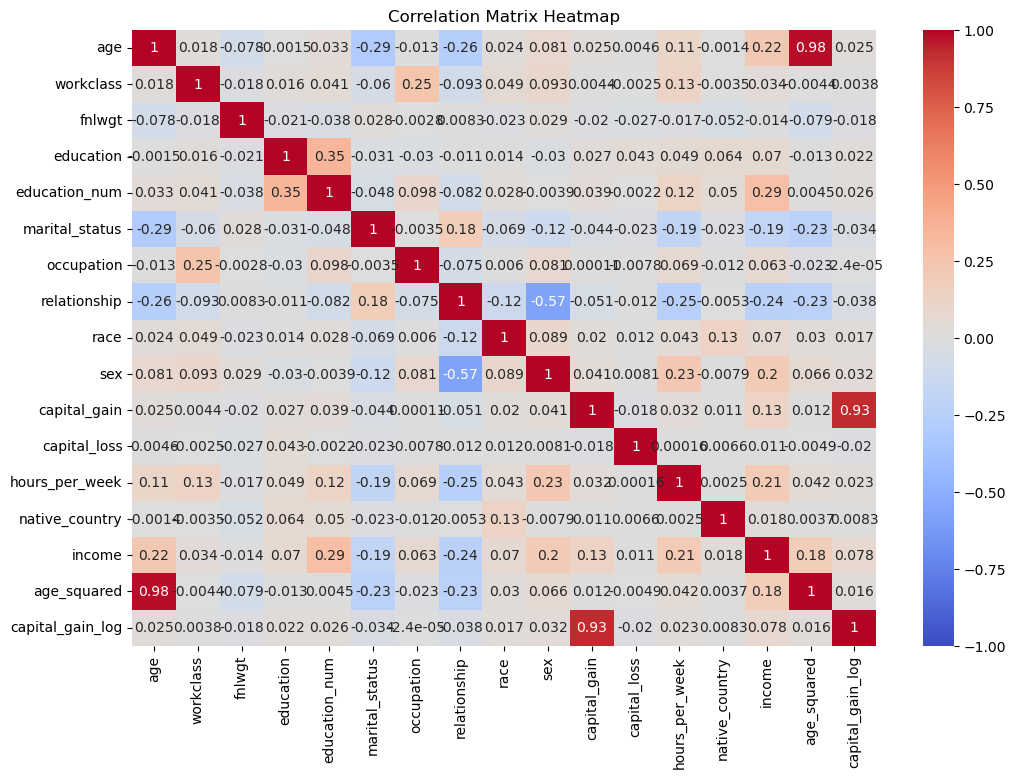

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()